# Assignment 4
## Author: Lei Cao

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Data Description
1. Airport Weather Station Data: BDL_Dec2018.csv - This will be your X data
2. Smart Home Temperature Data: 10681189_LivingRoom_CLEAN_Round1.xls (convert this to .csv before reading it in) - This will be the Y data

### Exploratory Data Analysis
Make three interesting plots
Make two interesting tables

Prepare the Data
- From the airport data, only keep these columns (a time/date stamp in 'valid', and 8 weather variables): valid, tmpf, dwpf, relh, drct, sknt, p01i, alti, mslp

In [ ]:
# Read in the X data
X = pd.read_csv('~/BDL_Dec2018.csv')
# Subset the columns needed
X = X[['valid','tmpf','dwpf','relh','drct','sknt','p01i','alti','mslp']]
X

,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp
0,12/1/2018 0:00,NaN,NaN,NaN,310.0,3.0,NaN,30.10,NaN
1,12/1/2018 0:05,NaN,NaN,NaN,350.0,3.0,NaN,30.10,NaN
2,12/1/2018 0:10,NaN,NaN,NaN,0.0,0.0,NaN,30.10,NaN
3,12/1/2018 0:15,NaN,NaN,NaN,0.0,0.0,NaN,30.10,NaN
4,12/1/2018 0:20,NaN,NaN,NaN,0.0,0.0,NaN,30.10,NaN
...,...,...,...,...,...,...,...,...,...
8811,12/30/2018 23:40,NaN,NaN,NaN,0.0,0.0,NaN,30.27,NaN
8812,12/30/2018 23:45,NaN,NaN,NaN,150.0,3.0,NaN,30.27,NaN
8813,12/30/2018 23:50,NaN,NaN,NaN,160.0,3.0,NaN,30.27,NaN
8814,12/30/2018 23:51,28.0,25.0,88.33,160.0,3.0,0.0,30.27,1025.3


- From the smart home data, only keep the date/time column and the temperature column

In [ ]:
# Read in the Y data
Y = pd.read_csv('~/LivingRoom.csv')
Y

,DateTime,TempF
0,12/3/2018 14:53,68.691
1,12/3/2018 14:53,68.666
2,12/3/2018 14:54,68.659
3,12/3/2018 14:54,68.677
4,12/3/2018 14:55,68.693
...,...,...
66929,12/26/2018 20:37,NaN
66930,12/26/2018 20:38,NaN
66931,12/26/2018 20:38,NaN
66932,12/26/2018 20:39,68.400


- Make date/time columns where appropriate

In [ ]:
# Convert the valid column in X data to datetime
print('X Data')
X['valid'] = pd.to_datetime(X['valid'])
print(X)
print('------------------------------------------------------------------------------')
# Convert the new DateTime column in Y data to datetime
print('Y Data')
Y['DateTime'] = pd.to_datetime(Y['DateTime'])
print(Y)

X Data
                   valid  tmpf  dwpf   relh   drct  sknt  p01i   alti    mslp
0    2018-12-01 00:00:00   NaN   NaN    NaN  310.0   3.0   NaN  30.10     NaN
1    2018-12-01 00:05:00   NaN   NaN    NaN  350.0   3.0   NaN  30.10     NaN
2    2018-12-01 00:10:00   NaN   NaN    NaN    0.0   0.0   NaN  30.10     NaN
3    2018-12-01 00:15:00   NaN   NaN    NaN    0.0   0.0   NaN  30.10     NaN
4    2018-12-01 00:20:00   NaN   NaN    NaN    0.0   0.0   NaN  30.10     NaN
...                  ...   ...   ...    ...    ...   ...   ...    ...     ...
8811 2018-12-30 23:40:00   NaN   NaN    NaN    0.0   0.0   NaN  30.27     NaN
8812 2018-12-30 23:45:00   NaN   NaN    NaN  150.0   3.0   NaN  30.27     NaN
8813 2018-12-30 23:50:00   NaN   NaN    NaN  160.0   3.0   NaN  30.27     NaN
8814 2018-12-30 23:51:00  28.0  25.0  88.33  160.0   3.0   0.0  30.27  1025.3
8815 2018-12-30 23:55:00   NaN   NaN    NaN  150.0   4.0   NaN  30.28     NaN

[8816 rows x 9 columns]
--------------------------------

- Follow the steps for data preparation:
 - Check missing values for the airport and the smart home data. Delete the rows with missing values. Interpolate them later if you still have NaN after resampling

In [ ]:
# Delete the rows with missing values for X data
X = X.set_index('valid')
X = X.dropna()
print('X Data')
print(X)
print('--------------------------------------------------------------------------')

# Delete the rows with missing values for Y data
Y = Y.set_index('DateTime')
Y = Y.dropna()
print('Y Data')
print(Y)

X Data
                     tmpf  dwpf    relh   drct  sknt  p01i   alti    mslp
valid                                                                    
2018-12-01 00:51:00  28.0  28.0  100.00  300.0   3.0   0.0  30.11  1019.7
2018-12-01 01:51:00  28.0  28.0  100.00  300.0   5.0   0.0  30.12  1020.0
2018-12-01 02:51:00  27.0  27.0  100.00  240.0   3.0   0.0  30.12  1020.1
2018-12-01 03:51:00  25.0  24.1   96.31    0.0   0.0   0.0  30.12  1020.1
2018-12-01 04:51:00  25.0  25.0  100.00  270.0   5.0   0.0  30.14  1020.9
...                   ...   ...     ...    ...   ...   ...    ...     ...
2018-12-30 19:51:00  33.1  25.0   71.82  210.0   4.0   0.0  30.26  1024.9
2018-12-30 20:51:00  32.0  25.0   75.07  170.0   6.0   0.0  30.26  1024.7
2018-12-30 21:51:00  30.9  25.0   78.48  200.0   5.0   0.0  30.27  1025.1
2018-12-30 22:51:00  27.0  24.1   88.65  170.0   6.0   0.0  30.27  1025.2
2018-12-30 23:51:00  28.0  25.0   88.33  160.0   3.0   0.0  30.27  1025.3

[713 rows x 8 columns]
-------

 - Resample both datasets to 15 min frequency
  - Indoor temperature needs to be rescaled to coarser resolution from 1 min to 15 min resolution and outdoor temperature needs to be rescaled to higher resolution from 60 mins to 15 mins

In [ ]:
# Resample for X data
print('X Data')
X = X.resample('15T').mean()
print(X)
print('--------------------------------------------------------------------------')
# Resample for Y data
print('Y data')
Y = Y.resample('15T').mean()
print(Y)

X Data
                     tmpf  dwpf    relh   drct  sknt  p01i   alti    mslp
valid                                                                    
2018-12-01 00:45:00  28.0  28.0  100.00  300.0   3.0   0.0  30.11  1019.7
2018-12-01 01:00:00   NaN   NaN     NaN    NaN   NaN   NaN    NaN     NaN
2018-12-01 01:15:00   NaN   NaN     NaN    NaN   NaN   NaN    NaN     NaN
2018-12-01 01:30:00   NaN   NaN     NaN    NaN   NaN   NaN    NaN     NaN
2018-12-01 01:45:00  28.0  28.0  100.00  300.0   5.0   0.0  30.12  1020.0
...                   ...   ...     ...    ...   ...   ...    ...     ...
2018-12-30 22:45:00  27.0  24.1   88.65  170.0   6.0   0.0  30.27  1025.2
2018-12-30 23:00:00   NaN   NaN     NaN    NaN   NaN   NaN    NaN     NaN
2018-12-30 23:15:00   NaN   NaN     NaN    NaN   NaN   NaN    NaN     NaN
2018-12-30 23:30:00   NaN   NaN     NaN    NaN   NaN   NaN    NaN     NaN
2018-12-30 23:45:00  28.0  25.0   88.33  160.0   3.0   0.0  30.27  1025.3

[2877 rows x 8 columns]
------

- Merge the two datasets together... only keep rows where you have smart home data

In [ ]:
X = X.reset_index()
Y = Y.reset_index()
merged = pd.merge(X, Y, left_on='valid', right_on='DateTime')
print(merged.shape)
merged.head()

(2232, 11)


,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,DateTime,TempF
0,2018-12-03 14:45:00,53.1,33.1,46.42,280.0,14.0,0.0,29.57,1001.3,2018-12-03 14:45:00,68.572000
1,2018-12-03 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-03 15:00:00,68.023533
2,2018-12-03 15:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-03 15:15:00,67.941900
3,2018-12-03 15:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-03 15:30:00,67.749733
4,2018-12-03 15:45:00,50.0,30.9,47.64,280.0,11.0,0.0,29.59,1002.2,2018-12-03 15:45:00,67.597500


- Interpolate the data for the columns (includes TempF) with missing values

In [ ]:
merged['tmpf'] = merged['tmpf'].interpolate()
merged['dwpf'] = merged['dwpf'].interpolate()
merged['relh'] = merged['relh'].interpolate()
merged['drct'] = merged['drct'].interpolate()
merged['sknt'] = merged['sknt'].interpolate()
merged['p01i'] = merged['p01i'].interpolate()
merged['alti'] = merged['alti'].interpolate()
merged['mslp'] = merged['mslp'].interpolate()
merged['TempF'] = merged['TempF'].interpolate()

- Create a new column for "hour"

In [ ]:
import datetime
merged['hour'] = pd.DatetimeIndex(merged['valid']).hour
print(merged.shape)
merged.head()

(2232, 12)


,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,DateTime,TempF,hour
0,2018-12-03 14:45:00,53.100,33.10,46.420,280.0,14.00,0.0,29.570,1001.300,2018-12-03 14:45:00,68.572000,14
1,2018-12-03 15:00:00,52.325,32.55,46.725,280.0,13.25,0.0,29.575,1001.525,2018-12-03 15:00:00,68.023533,15
2,2018-12-03 15:15:00,51.550,32.00,47.030,280.0,12.50,0.0,29.580,1001.750,2018-12-03 15:15:00,67.941900,15
3,2018-12-03 15:30:00,50.775,31.45,47.335,280.0,11.75,0.0,29.585,1001.975,2018-12-03 15:30:00,67.749733,15
4,2018-12-03 15:45:00,50.000,30.90,47.640,280.0,11.00,0.0,29.590,1002.200,2018-12-03 15:45:00,67.597500,15


Lag Variables (simple feature engineering)
- Shift all of the airport weather variables and HOUR with a lag of 1,2,3... Up to 16 periods

In [ ]:
# Create the lag data
def lag_var(df, n):
  new = df.copy()
  col = df.columns.to_list() # get columns name
  new_col = [s + '_' + str(n) for s in col]
  new_col_list = dict(zip(col, new_col))
  new.rename(columns=new_col_list, inplace=True)
  new.loc[-n] = np.NaN # adding a row
  new.index = new.index + n # shifting index
  new = new.sort_index()
  new = new.iloc[:-n, :]
  return(new)

tmp_data = merged[['tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'mslp', 'hour']]
lag_df = pd.concat([lag_var(tmp_data,1), lag_var(tmp_data,2), lag_var(tmp_data,3),
                   lag_var(tmp_data,4), lag_var(tmp_data,5), lag_var(tmp_data,6),
                   lag_var(tmp_data,7), lag_var(tmp_data,8), lag_var(tmp_data,9),
                   lag_var(tmp_data,10), lag_var(tmp_data,11), lag_var(tmp_data,12),
                   lag_var(tmp_data,13), lag_var(tmp_data,14), lag_var(tmp_data,15),
                   lag_var(tmp_data,16)], axis=1)

# Concatenate the 16 results into the original merged dataset
added_data = pd.concat([merged, lag_df], axis=1)
added_data = added_data[16:]
added_data = added_data.reset_index(drop=True)
print(added_data.shape)
added_data.head()

(2216, 156)


,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,DateTime,TempF,hour,tmpf_1,dwpf_1,relh_1,drct_1,sknt_1,p01i_1,alti_1,mslp_1,hour_1,tmpf_2,dwpf_2,relh_2,drct_2,sknt_2,p01i_2,alti_2,mslp_2,hour_2,tmpf_3,dwpf_3,relh_3,drct_3,sknt_3,p01i_3,alti_3,mslp_3,hour_3,tmpf_4,...,p01i_12,alti_12,mslp_12,hour_12,tmpf_13,dwpf_13,relh_13,drct_13,sknt_13,p01i_13,alti_13,mslp_13,hour_13,tmpf_14,dwpf_14,relh_14,drct_14,sknt_14,p01i_14,alti_14,mslp_14,hour_14,tmpf_15,dwpf_15,relh_15,drct_15,sknt_15,p01i_15,alti_15,mslp_15,hour_15,tmpf_16,dwpf_16,relh_16,drct_16,sknt_16,p01i_16,alti_16,mslp_16,hour_16
0,2018-12-03 18:45:00,45.00,33.100,62.83,260.0,4.00,0.0,29.6300,1003.400,2018-12-03 18:45:00,67.450167,18,45.475,32.825,61.1075,260.0,4.75,0.0,29.6250,1003.225,18.0,45.950,32.550,59.3850,260.0,5.50,0.0,29.6200,1003.050,18.0,46.425,32.275,57.6625,260.0,6.25,0.0,29.6150,1002.875,18.0,46.900,...,0.0,29.590,1002.2,15.0,50.775,31.45,47.3350,280.0,11.75,0.0,29.585,1001.975,15.0,51.550,32.00,47.0300,280.0,12.50,0.0,29.580,1001.750,15.0,52.325,32.55,46.7250,280.0,13.25,0.0,29.575,1001.525,15.0,53.100,33.10,46.420,280.0,14.00,0.0,29.570,1001.300,14.0
1,2018-12-03 19:00:00,45.25,33.325,62.80,270.0,5.25,0.0,29.6325,1003.525,2018-12-03 19:00:00,67.137567,19,45.000,33.100,62.8300,260.0,4.00,0.0,29.6300,1003.400,18.0,45.475,32.825,61.1075,260.0,4.75,0.0,29.6250,1003.225,18.0,45.950,32.550,59.3850,260.0,5.50,0.0,29.6200,1003.050,18.0,46.425,...,0.0,29.595,1002.3,16.0,50.000,30.90,47.6400,280.0,11.00,0.0,29.590,1002.200,15.0,50.775,31.45,47.3350,280.0,11.75,0.0,29.585,1001.975,15.0,51.550,32.00,47.0300,280.0,12.50,0.0,29.580,1001.750,15.0,52.325,32.55,46.725,280.0,13.25,0.0,29.575,1001.525,15.0
2,2018-12-03 19:15:00,45.50,33.550,62.77,280.0,6.50,0.0,29.6350,1003.650,2018-12-03 19:15:00,66.601933,19,45.250,33.325,62.8000,270.0,5.25,0.0,29.6325,1003.525,19.0,45.000,33.100,62.8300,260.0,4.00,0.0,29.6300,1003.400,18.0,45.475,32.825,61.1075,260.0,4.75,0.0,29.6250,1003.225,18.0,45.950,...,0.0,29.600,1002.4,16.0,49.725,30.90,48.1375,277.5,9.50,0.0,29.595,1002.300,16.0,50.000,30.90,47.6400,280.0,11.00,0.0,29.590,1002.200,15.0,50.775,31.45,47.3350,280.0,11.75,0.0,29.585,1001.975,15.0,51.550,32.00,47.030,280.0,12.50,0.0,29.580,1001.750,15.0
3,2018-12-03 19:30:00,45.75,33.775,62.74,290.0,7.75,0.0,29.6375,1003.775,2018-12-03 19:30:00,66.294467,19,45.500,33.550,62.7700,280.0,6.50,0.0,29.6350,1003.650,19.0,45.250,33.325,62.8000,270.0,5.25,0.0,29.6325,1003.525,19.0,45.000,33.100,62.8300,260.0,4.00,0.0,29.6300,1003.400,18.0,45.475,...,0.0,29.605,1002.5,16.0,49.450,30.90,48.6350,275.0,8.00,0.0,29.600,1002.400,16.0,49.725,30.90,48.1375,277.5,9.50,0.0,29.595,1002.300,16.0,50.000,30.90,47.6400,280.0,11.00,0.0,29.590,1002.200,15.0,50.775,31.45,47.335,280.0,11.75,0.0,29.585,1001.975,15.0
4,2018-12-03 19:45:00,46.00,34.000,62.71,300.0,9.00,0.0,29.6400,1003.900,2018-12-03 19:45:00,66.135133,19,45.750,33.775,62.7400,290.0,7.75,0.0,29.6375,1003.775,19.0,45.500,33.550,62.7700,280.0,6.50,0.0,29.6350,1003.650,19.0,45.250,33.325,62.8000,270.0,5.25,0.0,29.6325,1003.525,19.0,45.000,...,0.0,29.610,1002.6,16.0,49.175,30.90,49.1325,272.5,6.50,0.0,29.605,1002.500,16.0,49.450,30.90,48.6350,275.0,8.00,0.0,29.600,1002.400,16.0,49.725,30.90,48.1375,277.5,9.50,0.0,29.595,1002.300,16.0,50.000,30.90,47.640,280.0,11.00,0.0,29.590,1002.200,15.0


In [ ]:
# Adjust the position of the DateTime and TempF columns for splitting convenience
added_data = added_data.set_index('DateTime')
added_data = added_data.reset_index()
added_data = added_data.set_index('TempF')
added_data = added_data.reset_index()
print(added_data.shape)
added_data.head()

(2216, 156)


,TempF,DateTime,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,hour,tmpf_1,dwpf_1,relh_1,drct_1,sknt_1,p01i_1,alti_1,mslp_1,hour_1,tmpf_2,dwpf_2,relh_2,drct_2,sknt_2,p01i_2,alti_2,mslp_2,hour_2,tmpf_3,dwpf_3,relh_3,drct_3,sknt_3,p01i_3,alti_3,mslp_3,hour_3,tmpf_4,...,p01i_12,alti_12,mslp_12,hour_12,tmpf_13,dwpf_13,relh_13,drct_13,sknt_13,p01i_13,alti_13,mslp_13,hour_13,tmpf_14,dwpf_14,relh_14,drct_14,sknt_14,p01i_14,alti_14,mslp_14,hour_14,tmpf_15,dwpf_15,relh_15,drct_15,sknt_15,p01i_15,alti_15,mslp_15,hour_15,tmpf_16,dwpf_16,relh_16,drct_16,sknt_16,p01i_16,alti_16,mslp_16,hour_16
0,67.450167,2018-12-03 18:45:00,2018-12-03 18:45:00,45.00,33.100,62.83,260.0,4.00,0.0,29.6300,1003.400,18,45.475,32.825,61.1075,260.0,4.75,0.0,29.6250,1003.225,18.0,45.950,32.550,59.3850,260.0,5.50,0.0,29.6200,1003.050,18.0,46.425,32.275,57.6625,260.0,6.25,0.0,29.6150,1002.875,18.0,46.900,...,0.0,29.590,1002.2,15.0,50.775,31.45,47.3350,280.0,11.75,0.0,29.585,1001.975,15.0,51.550,32.00,47.0300,280.0,12.50,0.0,29.580,1001.750,15.0,52.325,32.55,46.7250,280.0,13.25,0.0,29.575,1001.525,15.0,53.100,33.10,46.420,280.0,14.00,0.0,29.570,1001.300,14.0
1,67.137567,2018-12-03 19:00:00,2018-12-03 19:00:00,45.25,33.325,62.80,270.0,5.25,0.0,29.6325,1003.525,19,45.000,33.100,62.8300,260.0,4.00,0.0,29.6300,1003.400,18.0,45.475,32.825,61.1075,260.0,4.75,0.0,29.6250,1003.225,18.0,45.950,32.550,59.3850,260.0,5.50,0.0,29.6200,1003.050,18.0,46.425,...,0.0,29.595,1002.3,16.0,50.000,30.90,47.6400,280.0,11.00,0.0,29.590,1002.200,15.0,50.775,31.45,47.3350,280.0,11.75,0.0,29.585,1001.975,15.0,51.550,32.00,47.0300,280.0,12.50,0.0,29.580,1001.750,15.0,52.325,32.55,46.725,280.0,13.25,0.0,29.575,1001.525,15.0
2,66.601933,2018-12-03 19:15:00,2018-12-03 19:15:00,45.50,33.550,62.77,280.0,6.50,0.0,29.6350,1003.650,19,45.250,33.325,62.8000,270.0,5.25,0.0,29.6325,1003.525,19.0,45.000,33.100,62.8300,260.0,4.00,0.0,29.6300,1003.400,18.0,45.475,32.825,61.1075,260.0,4.75,0.0,29.6250,1003.225,18.0,45.950,...,0.0,29.600,1002.4,16.0,49.725,30.90,48.1375,277.5,9.50,0.0,29.595,1002.300,16.0,50.000,30.90,47.6400,280.0,11.00,0.0,29.590,1002.200,15.0,50.775,31.45,47.3350,280.0,11.75,0.0,29.585,1001.975,15.0,51.550,32.00,47.030,280.0,12.50,0.0,29.580,1001.750,15.0
3,66.294467,2018-12-03 19:30:00,2018-12-03 19:30:00,45.75,33.775,62.74,290.0,7.75,0.0,29.6375,1003.775,19,45.500,33.550,62.7700,280.0,6.50,0.0,29.6350,1003.650,19.0,45.250,33.325,62.8000,270.0,5.25,0.0,29.6325,1003.525,19.0,45.000,33.100,62.8300,260.0,4.00,0.0,29.6300,1003.400,18.0,45.475,...,0.0,29.605,1002.5,16.0,49.450,30.90,48.6350,275.0,8.00,0.0,29.600,1002.400,16.0,49.725,30.90,48.1375,277.5,9.50,0.0,29.595,1002.300,16.0,50.000,30.90,47.6400,280.0,11.00,0.0,29.590,1002.200,15.0,50.775,31.45,47.335,280.0,11.75,0.0,29.585,1001.975,15.0
4,66.135133,2018-12-03 19:45:00,2018-12-03 19:45:00,46.00,34.000,62.71,300.0,9.00,0.0,29.6400,1003.900,19,45.750,33.775,62.7400,290.0,7.75,0.0,29.6375,1003.775,19.0,45.500,33.550,62.7700,280.0,6.50,0.0,29.6350,1003.650,19.0,45.250,33.325,62.8000,270.0,5.25,0.0,29.6325,1003.525,19.0,45.000,...,0.0,29.610,1002.6,16.0,49.175,30.90,49.1325,272.5,6.50,0.0,29.605,1002.500,16.0,49.450,30.90,48.6350,275.0,8.00,0.0,29.600,1002.400,16.0,49.725,30.90,48.1375,277.5,9.50,0.0,29.595,1002.300,16.0,50.000,30.90,47.640,280.0,11.00,0.0,29.590,1002.200,15.0


Data Splitting
1. Make a separate data partition for 'X' and 'Y'
2. Keep the first 90% of the data for the training partition
 - Create X_train, Y_train
3. Keep the last 10% of the data for the test partition
 - Create X_test, Y_test

In [ ]:
# Subset X data
X = added_data.iloc[:, 2:]
X = X.set_index('valid')
# Splitting data
X_train = X.head(1994)
X_test = X.tail(222)

In [ ]:
# Subset Y data
Y = added_data.iloc[:, 0:2]
Y = Y.set_index('DateTime')
# Splitting data
Y_train = Y.head(1994)
Y_test = Y.tail(222)

Fit A Spot Checking Model
1. Fit at least three spot checking models
2. For the model that did the best, do some hyperparameter tuning and show the results of the best fitting model:
 - Scatterplot of actual vs. predicted for training results (90%) - Add a subtitle that says the RMSE for training results
 - Scatterplot of actual vs. predicted for test results (10%) - Add a subtitle that says the RMSE for test results

In [ ]:
from numpy import arange
from pandas import set_option
from sklearn.preprocessing import StandardScaler

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from matplotlib import pyplot

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [ ]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
scoring = 'neg_mean_squared_error'

# Spot Check Algorithms
models = []

models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))

In [ ]:
# Evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=None, shuffle=False)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: -16.794374 (13.378998)
Ridge: -15.383822 (13.221596)
Lasso: -13.009180 (13.365174)


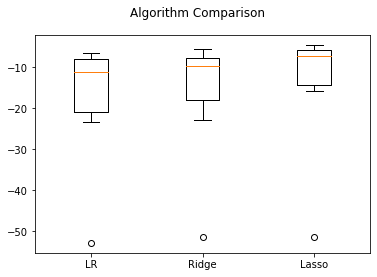

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# Fit the models
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
acc_lr = round(lr.score(X_test, Y_test) * 100, 2)

# Ridge
ridge = Ridge()
ridge.fit(X_train, Y_train)
Y_pred = ridge.predict(X_test)
acc_ridge = round(ridge.score(X_test, Y_test) * 100, 2)

# Lasso
lasso = Lasso()
lasso.fit(X_train, Y_train)
Y_pred = lasso.predict(X_test)
acc_lasso = round(lasso.score(X_train, Y_train) * 100, 2)

In [ ]:
# Save the model results
print("Machine Learning algorithm scores")
model_results = pd.DataFrame({
    'Model': ['Linear Regression', 
              'Ridge', 'Lasso'],
    'Score': [acc_lr, acc_ridge, acc_lasso]})
model_results.sort_values(by='Score', ascending=False)

Machine Learning algorithm scores


,Model,Score
2,Lasso,31.83
0,Linear Regression,23.29
1,Ridge,22.32


In [ ]:
# From the results above we can know that the Lasso model is the best fitting one

# set up the pipeline for hyperparameter tuning
from sklearn.model_selection import validation_curve
pipe_lasso = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('clf', Lasso())])

param_range = [0.01, 0.1, 1, 10, 100]
alpha = [0.1, 0.2, 0.3, 0.4, 0.5]
grid_params_lasso = [{'clf__alpha': alpha, 'clf__max_iter': param_range, 'clf__tol': alpha}]

# Construct grid searches
jobs = -1
gs_lasso = GridSearchCV(estimator=pipe_lasso, param_grid=grid_params_lasso, scoring='neg_mean_squared_error', cv=10, n_jobs=jobs)

gs_lasso.fit(X_train, Y_train)
print('neg_mean_squared_error: %.3f' % gs_lasso.best_score_)

neg_mean_squared_error: -15.641


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1, tolerance: 2999.7910497111075
  positive)


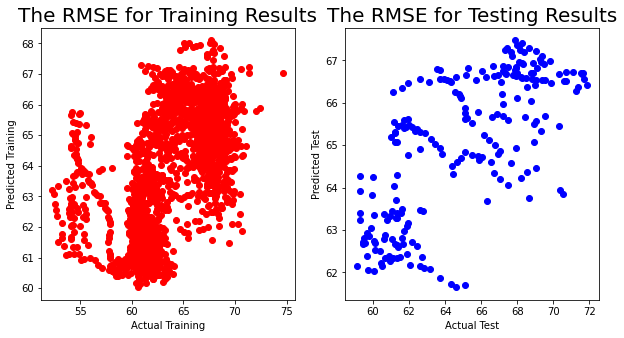

In [ ]:
# Since the hyperparameter tuning did not decrease the mean squared error of the fit Lasso model,
# I have to give it up and keep the original Lasso model.

# Scatterplots
%matplotlib inline
import matplotlib.pyplot as plt

train_pred = lasso.predict(X_train)
test_pred = lasso.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].scatter(x = Y_train, y = train_pred, color='red')
axes[0].set_xlabel('Actual Training')
axes[0].set_ylabel('Predicted Training')
axes[0].set_title('The RMSE for Training Results', fontsize=20)

axes[1].scatter(x = Y_test, y = test_pred, color='blue')
axes[1].set_xlabel('Actual Test')
axes[1].set_ylabel('Predicted Test')
axes[1].set_title('The RMSE for Testing Results', fontsize=20)

plt.show()

Fit A Neural Network
1. Using the same lag data, fit a neural network with at least two hidden layers, at least 16 hidden units in each hidden layer with a 'relu' activation function, and dropout (0.1) between the hidden layers
2. For your neural network, show a:
 - Scatterplot of actual vs. predicted for training results (90%) - Add a subtitle that says the RMSE for training results
 - Scatterplot of actual vs. predicted for test results (10%) - Add a subtitle that says the RMSE for test results

In [ ]:
from tensorflow.keras import layers, Sequential

model = Sequential()
model.add(layers.Dense(1200, activation='relu',input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.1))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dropout(0.1))
# model.add(layers.Dense(250, activation='relu'))
# model.add(layers.Dropout(0.1))
model.add(layers.Dense(126, activation='relu'))
model.add(layers.Dropout(0.1))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dropout(0.1))
model.add(layers.Dense(1)) # linear

In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['rmse'])

In [ ]:
# Add an early stopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='rmse', 
                   mode='min', 
                   patience=50, 
                   verbose=1)

history = model.fit(X_train, Y_train,  # train data
                    validation_data=(X_test, Y_test), # validation data
                    epochs=5000,
                    batch_size=20,
                    callbacks=[es],
                    verbose=1) # show verbose

Epoch 1/5000
100/100 [==============================] - 1s 9ms/step - loss: 41960.0703 - mae: 46.5028 - val_loss: 105.5656 - val_mae: 9.9090
Epoch 2/5000
100/100 [==============================] - 1s 8ms/step - loss: 279.7700 - mae: 12.8479 - val_loss: 65.5340 - val_mae: 7.5660
Epoch 3/5000
100/100 [==============================] - 1s 7ms/step - loss: 194.2486 - mae: 10.7539 - val_loss: 100.6609 - val_mae: 9.6794
Epoch 4/5000
100/100 [==============================] - 1s 7ms/step - loss: 165.8652 - mae: 10.1620 - val_loss: 39.7093 - val_mae: 5.1042
Epoch 5/5000
100/100 [==============================] - 1s 7ms/step - loss: 135.6004 - mae: 9.3447 - val_loss: 16.3550 - val_mae: 3.4222
Epoch 6/5000
100/100 [==============================] - 1s 8ms/step - loss: 138.2444 - mae: 9.1689 - val_loss: 10.9433 - val_mae: 2.9654
Epoch 7/5000
100/100 [==============================] - 1s 8ms/step - loss: 130.6868 - mae: 9.1670 - val_loss: 30.6629 - val_mae: 4.8390
Epoch 8/5000
100/100 [===========

Text(0.5, 1.0, 'The RMSE for Testing Results')

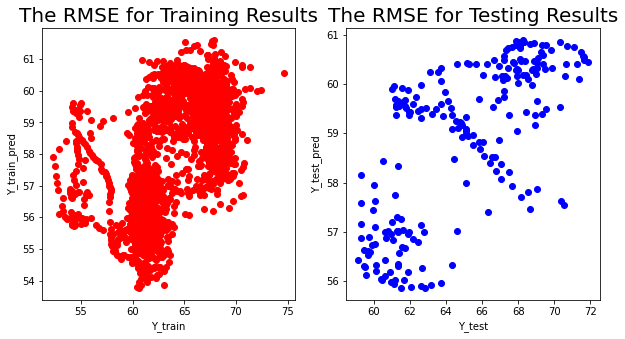

In [ ]:
# Plot the actual vs. predicted for train and validation
nn_train_pred = model.predict(X_train)
nn_test_pred = model.predict(X_test)

fig, axs = plt.subplots(1,2,figsize=(10,5))
axs[0].scatter(Y_train, nn_train_pred, color='red')
axs[0].set_xlabel('Y_train')
axs[0].set_ylabel('Y_train_pred')
axs[0].set_title('The RMSE for Training Results', fontsize=20)

axs[1].scatter(Y_test,nn_test_pred, color='blue')
axs[1].set_xlabel('Y_test')
axs[1].set_ylabel('Y_test_pred')
axs[1].set_title('The RMSE for Testing Results', fontsize=20)

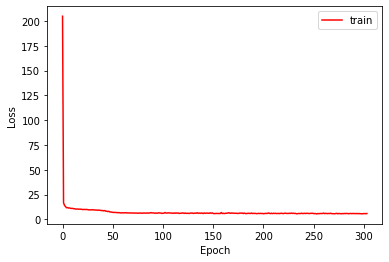

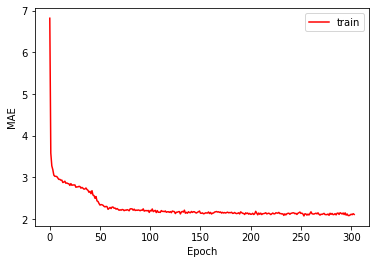

In [ ]:
# Plot the loss function
fig, ax = plt.subplots(1, 1)
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
# ax.plot(np.sqrt(history.history['val_loss']), 'b', label='val')
ax.set_xlabel(r'Epoch')
ax.set_ylabel(r'Loss')
ax.legend()


# Plot the rmse
fig, ax = plt.subplots(1, 1)
ax.plot(np.sqrt(history.history['rmse']), 'r', label='train')
# ax.plot(np.sqrt(history.history['val_rmse']), 'b', label='val')
ax.set_xlabel(r'Epoch')
ax.set_ylabel(r'RMSE')
ax.legend()


Feature Importance
1. Run a permutation test for your best fitting spot check model and your neural network. Which variables were the most important?
 - Show the feature importance figure
 - Add a comment saying which variables are most important
 - Add two sentences about how permutation testing works

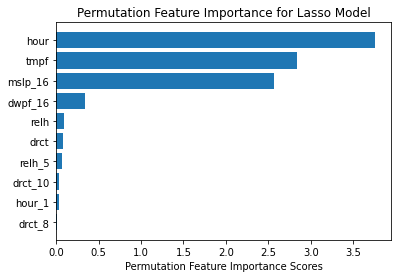

In [ ]:
from sklearn.inspection import permutation_importance

# Best fitting spot check model
num = 10
results = permutation_importance(lasso, X_train, Y_train, scoring='neg_mean_squared_error')
# Get importance
importance = results.importances_mean
sorted_idx = np.argsort(importance)[-num:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos[-num:], importance[sorted_idx], align='center')
plt.yticks(pos[-num:], X.columns[sorted_idx])
plt.xlabel('Permutation Feature Importance Scores')
plt.title('Permutation Feature Importance for Lasso Model')
plt.show()

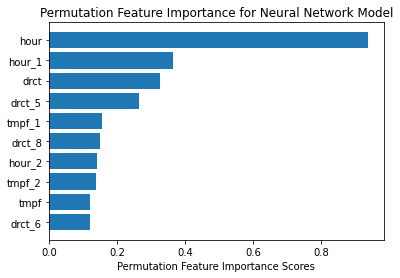

In [ ]:
# Neural network
num = 10
results = permutation_importance(model, X_train, Y_train, scoring='neg_mean_squared_error')
# Get importance
importance = results.importances_mean
sorted_idx = np.argsort(importance)[-num:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos[-num:], importance[sorted_idx], align='center')
plt.yticks(pos[-num:], X.columns[sorted_idx])
plt.xlabel('Permutation Feature Importance Scores')
plt.title('Permutation Feature Importance for Neural Network Model')
plt.show()

In [ ]:
# As the two bar charts show above, for both the Lasso model and the neural network model, the hour is the most important variable.

# Permutation testing is calculating the permutation feature importance, 
# which is the decrease in a model score when a single feature value is randomly shuffled.
# It breaks the relationship between the feature and target variable, so the decrease in the
# model score indicates how much the model depends on the feature.